In [1]:
%matplotlib inline
import pandas
import pylab
import pytry
import seaborn

First, we load the data.  This may take a long time....

In [2]:
data = pytry.read('data')

In [3]:
old_data = pytry.read('old_data')

Now convert it all into a useful pandas DataFrame

In [6]:
data2 = []
for i, d in enumerate(data+old_data):
    stay = d['stay_prob']
    for rewarded in [True, False]:
        for rare in [True, False]:
            d2 = dict(d)
            d2['rewarded']='+' if rewarded else '-'
            d2['rare']='R' if rare else 'C'
            d2['stay']=stay[rewarded,rare]
            
            d2['type']='%s%s' % ('R' if rare else 'C',
                                  '+' if rewarded else '-')
            data2.append(d2)
            d2.pop('history')
            d2.pop('rewards')
            d2.pop('stay_prob')
            #if not d2.has_key('N_product'):
            if 'N_product' not in d2:
                d2['N_product'] = 200
            #if not d2.has_key('syn'):
            if 'syn' not in d2:
                d2['syn'] = 0.005
            #if not d2.has_key('rate'):
            if 'rate' not in d2:
                d2['rate'] = False
            
df = pandas.DataFrame(data2)            

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


Now we specify what we want to plot.

In [27]:
figure = 5

if figure == 1:
    initial_query = 'N_product==200 and T_interval==0.05 and rate==False and syn==0.005 and env_seed==2'
    param = 'N_state_action'      # the parameter to vary
    name = 'neurons'              # a human-readable name for that parameter (for plot titles)
    vals = [100, 500, 750, 1000]  # the values to vary the parameter over
elif figure == 2:
    initial_query = 'N_state_action==500 and T_interval==0.05 and rate==False and syn==0.005 and env_seed==2'
    param = 'N_product'      # the parameter to vary
    name = 'product neurons'              # a human-readable name for that parameter (for plot titles)
    vals = [100, 200, 300, 500, 750, 1000]  # the values to vary the parameter over
elif figure == 3:
    initial_query = 'T_interval==0.05 and rate==True and N_state_action==500'
    param = 'alpha'      # the parameter to vary
    name = 'learning rate'              # a human-readable name for that parameter (for plot titles)
    vals = [ 0.05,  0.1,   0.3,   0.5,   0.7,   0.9,   1.  ]  # the values to vary the parameter over
elif figure == 4:
    initial_query = 'rate==True and T_interval==0.05 and seed==1 and alpha==0.3 and N_state_action==100'
    param = 'env_seed'      # the parameter to vary
    name = 'environment'              # a human-readable name for that parameter (for plot titles)
    vals = np.arange(1, 21)  # the values to vary the parameter over
elif figure == 5:
    initial_query = 'N_product==200 and N_state_action==500 and T_interval==0.05 and syn==0.005 and alpha==0.3 and direct==False'
    param = 'seed'      # the parameter to vary
    name = 'nengo seed'              # a human-readable name for that parameter (for plot titles)
    vals = np.arange(1, 21)  # the values to vary the parameter over
elif figure == 6:
    initial_query = 'T_interval==0.05 and alpha==0.3 and n_intervals==20000 and direct==False and rate!=True and N_product==200 and syn==0.005 and env_seed in [2]'
    param = 'N_state_action'      # the parameter to vary
    name = 'neurons'              # a human-readable name for that parameter (for plot titles)
    vals = [  20,   50,   70,  100,  200,  500,  750, 1000]  # the values to vary the parameter over
elif figure == 7:
    initial_query = 'N_state_action==500 and alpha==0.3 and n_intervals==20000 and direct==False and rate!=True and N_product==200 and syn==0.005 and seed==1'
    param = 'T_interval'      # the parameter to vary
    name = 'interval'              # a human-readable name for that parameter (for plot titles)
    #vals = [ 0.04,  0.05,  0.09,  0.1,   0.2,   0.3,   0.4,   0.41,  0.45,  0.49,  0.5,   0.51, 0.6 ]  # the values to vary the parameter over
    vals = [ 0.05,  0.2, 0.49, 0.5,   0.51]  # the values to vary the parameter over
    

In [28]:
df2 = df.query(initial_query)
df2

,D,N_product,N_state_action,T_interval,alpha,backend,choice_noise,direct,dt,env_seed,n_intervals,neuron_type,rare,rate,rewarded,seed,stay,syn,type
108,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,R,False,+,1,0.510151,0.005,R+
109,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,C,False,+,1,0.736876,0.005,C+
110,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,R,False,-,1,0.687989,0.005,R-
111,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,C,False,-,1,0.451613,0.005,C-
512,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,R,False,+,2,0.764476,0.005,R+
513,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,C,False,+,2,0.857795,0.005,C+
514,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,R,False,-,2,0.861281,0.005,R-
515,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,C,False,-,2,0.702148,0.005,C-
864,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,R,False,+,3,0.464400,0.005,R+
865,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,C,False,+,3,0.648577,0.005,C+


In [29]:
df2 = df2.drop_duplicates()

In [30]:
import numpy as np
for k in df2.keys():
    if k != 'stay':
        print (k, np.unique(getattr(df2, k)))

D [5]
N_product [200]
N_state_action [500]
T_interval [ 0.05]
alpha [ 0.3]
backend ['nengo']
choice_noise [ 0.05]
direct [False]
dt [ 0.001]
env_seed [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.]
n_intervals [   10 20000]
neuron_type ['default']
rare ['C' 'R']
rate [False  True]
rewarded ['+' '-']
seed [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
syn [ 0.005]
type ['C+' 'C-' 'R+' 'R-']


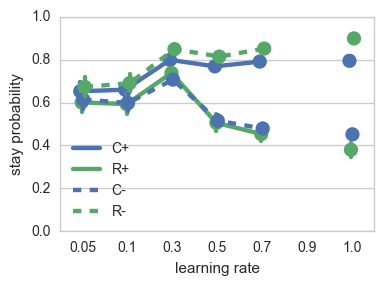

In [16]:
seaborn.set_style("whitegrid")
pylab.figure(figsize=(4,3))

colors = seaborn.color_palette('deep', 2)
palette = {
    'C+': colors[0],
    'R+': colors[1],
    'C-': colors[0],
    'R-': colors[1],
}

seaborn.pointplot(x=param, y='stay', hue='type', data=df2, 
                  order=vals,
                  dodge=True,
                  hue_order=['C+', 'R+', 'C-', 'R-'], 
                  linestyles=['-','-','--','--'], 
                  palette=colors)
ax = pylab.gca()
pylab.legend(title='', loc='best', handles=ax.lines[::(len(vals)+1)], labels=['C+', 'R+', 'C-', 'R-'])
pylab.ylim(0,1)
pylab.xlabel(name)
pylab.ylabel('stay probability')
pylab.tight_layout()
pylab.savefig('%s.png' % param, dpi=450)
pylab.show()

N=20
alpha 0.05


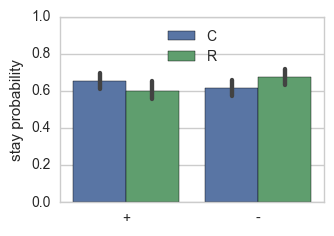

N=20
alpha 0.1


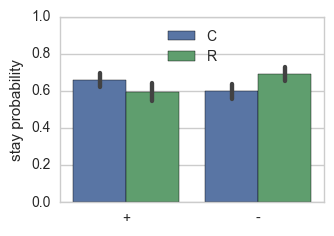

N=2903
alpha 0.3


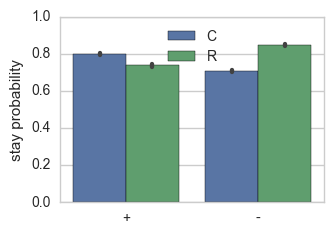

N=20
alpha 0.5


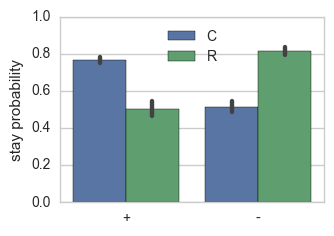

N=20
alpha 0.7


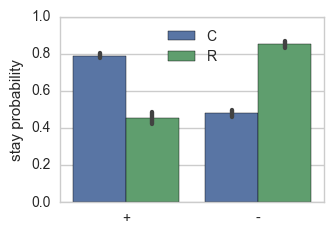

N=0
alpha 0.9


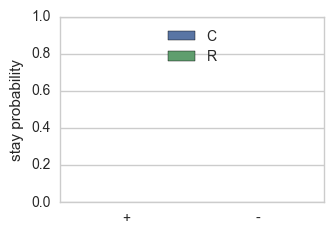

N=20
alpha 1.0


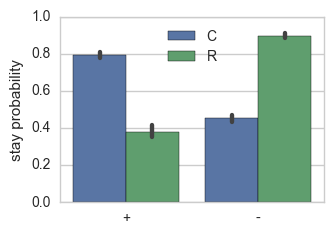

In [18]:
import pylab

for v in vals:
    df_v = df2.query('%s==%g' % (param, v))
    print('N=%d' % (len(df_v)/4))
    print (param, v)
    pylab.figure(figsize=(3.5,2.5))
    seaborn.barplot('rewarded', 'stay', hue='rare', data=df_v, order=['+', '-'], hue_order=['C','R'])
    #pylab.title('%s: %g' %(name, v))
    pylab.ylim(0,1)
    pylab.legend(title='', loc='upper center')
    pylab.xlabel('')
    pylab.ylabel('stay probability')
    pylab.tight_layout()
    pylab.savefig('%s-%g.png' % (param, v), dpi=450)
    pylab.show()